# Análisis de datos de las visitas a los Museos de Madrid

### Proyecto focalizado en el análisis de datos sobre los visitantes en los museos de la Comunidad de Madrid. 


Paula Garcia Fernandez  -  octubre 2024


---

***

## OBTENCIÓN DE LOS DATOS

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

### CONSUMO CULTURAL

In [3]:
# info general datos informacion comunicacion transporte
datos_museos_1 = pd.read_csv('./datos/otros_datos/https-datos-madrid-es-egob-catalogo-201132-0-museos-3.csv' , sep=";", encoding='latin')

# la calificacion por museo es interesante pero el mas visitado es el museo de historia de madrid y algo no me cuadra...
datos_museos_2 = pd.read_csv("./datos/otros_datos/estudioSatisfaccion2023.csv", sep=";", encoding='utf-8')

# IMPORATENTE ESTE ES MUY BUENO PARA UNA INTRO   pero faltan videojuegos... estos snobs culturetas del mundo del arte son de lo peor...
datos_museos_3 = pd.read_csv("./datos/otros_datos/actividades_culturales.csv", sep=",", encoding='utf-8')

# ESTE ESTA MUY GUAY PARA VER LOCALIZACIONES Y FOCOS DE INTERES CULTURAL
datos_museos_4 = pd.read_csv("./datos/otros_datos/MuseosdeMadrid_-1519955177370181428.csv", sep=",", encoding='utf-8')

### **JOBO** - CONSUMO CULTURAL JUVENIL

### TARIFAS Y VISITANTES


In [4]:
# SACAR PRECIOS
tarifas = pd.read_csv("./datos/VISITANTES_GENERAL/tarifas_museos_madrid.csv", sep=",", encoding='utf-8')

# SACAR MEDIA DE EDADES Y PROPORCION DE VISITANTES NACIONALES INTERNACIONALES
visitantes = pd.read_csv("./datos/VISITANTES_GENERAL/visitantes_museos_madrid_visitas.csv", sep=",", encoding='utf-8')

# ESTO MEJOR SACARLO DE MANERA INDIVIDUAL EN CADA MUSEO
visitantes_renta_estudios = pd.read_csv("./datos/VISITANTES_GENERAL/visitantes_museos_madrid_amplio.csv", sep=",", encoding='utf-8')

### MUSEOS INDIVIDUALES


In [5]:
prado = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_del_prado_visitantes_filtrados.csv", sep=",", encoding='utf-8')
caixa_forum = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/caixaforum_madrid_visitantes_filtrados.csv", sep=",", encoding='utf-8')
arqueologico = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_arqueológico_nacional_visitantes_filtrados.csv", sep=",", encoding='utf-8')
cerralbo = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_cerralbo_visitantes_filtrados.csv", sep=",", encoding='utf-8')
romanticismo = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_del_romanticismo_visitantes_filtrados.csv", sep=",", encoding='utf-8')
historia_madrid = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_de_historia_de_madrid_visitantes_filtrados.csv", sep=",", encoding='utf-8')
nacional_de_ciencias_naturales = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_nacional_de_ciencias_naturales_visitantes_filtrados.csv", sep=",", encoding='utf-8')
reina_sofia = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_reina_sofia_visitantes_filtrados.csv", sep=",", encoding='utf-8')
santiago_bernabeu = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_santiago_bernabeu_visitantes_filtrados.csv", sep=",", encoding='utf-8')
sorolla = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_sorolla_visitantes_filtrados.csv", sep=",", encoding='utf-8')
thyssen = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_thyssen_bornemisza_visitantes_filtrados.csv", sep=",", encoding='utf-8')

---

***

# DATA CLEANING

In [6]:
def categorize_activity(activity):
    if 'museos' in activity.lower() or 'exposiciones' in activity.lower() or 'galerías de arte' in activity.lower():
        return 'Museos y exposiciones'
    elif 'monumentos' in activity.lower() or 'yacimientos' in activity.lower():
        return 'Monumentos y yacimientos'
    elif 'biblioteca' in activity.lower() or 'archivos' in activity.lower():
        return 'Archivos y bibliotecas'
    elif 'libros' in activity.lower() or 'lectores' in activity.lower():
        return 'Lectura'
    elif 'teatro' in activity.lower() or 'ópera' in activity.lower() or 'zarzuela' in activity.lower() or \
         'ballet' in activity.lower() or 'danza' in activity.lower() or 'circo' in activity.lower():
        return 'Artes escénicas'
    elif 'conciertos' in activity.lower():
        return 'Música'
    elif 'cine' in activity.lower():
        return 'Cine'
    else:
        return 'Otras actividades'


datos_museos_3['Grupo_Actividad'] = datos_museos_3['Unnamed: 0'].apply(categorize_activity)
datos_museos_3.head(1)

,Unnamed: 0,Hombres_2021,Hombres_2018,Hombres_2014,Hombres_2010,Mujeres_2021,Mujeres_2018,Mujeres_2014,Mujeres_2010,Grupo_Actividad
0,"Visitaron museos, exposiciones y galerías de arte",26.5,46.5,38.8,38.1,24.6,46.9,40.1,37.6,Museos y exposiciones


In [7]:
numeric_columns = ['Hombres_2021', 'Hombres_2018', 'Hombres_2014', 'Hombres_2010', 'Mujeres_2021', 'Mujeres_2018', 'Mujeres_2014', 'Mujeres_2010']

datos_museos_3[numeric_columns] = datos_museos_3[numeric_columns].astype(float)

grouped_data = datos_museos_3.groupby('Grupo_Actividad')[numeric_columns].mean()
grouped_data


,Hombres_2021,Hombres_2018,Hombres_2014,Hombres_2010,Mujeres_2021,Mujeres_2018,Mujeres_2014,Mujeres_2010
Grupo_Actividad,,,,,,,,
Archivos y bibliotecas,10.125000,15.650000,14.350000,14.450000,11.675000,17.700000,16.525000,15.500000
Artes escénicas,2.460000,7.800000,7.400000,6.500000,2.740000,9.940000,9.480000,8.125000
Cine,28.100000,58.400000,54.400000,50.500000,27.400000,57.300000,53.600000,47.700000
Lectura,37.783333,39.866667,36.016667,44.500000,41.283333,43.633333,40.416667,47.633333
Monumentos y yacimientos,23.900000,41.600000,34.000000,33.166667,20.366667,39.733333,33.200000,29.633333
Museos y exposiciones,17.550000,32.800000,26.650000,26.875000,16.025000,33.675000,27.950000,27.000000
Música,7.300000,20.450000,16.900000,18.300000,7.000000,19.100000,16.200000,15.350000
Otras actividades,11.350000,31.500000,28.400000,26.400000,12.050000,33.450000,30.650000,26.250000


In [8]:
datos_museos_2021 = grouped_data[['Hombres_2021', 'Mujeres_2021']]
datos_museos_2021.head(1)

,Hombres_2021,Mujeres_2021
Grupo_Actividad,,
Archivos y bibliotecas,10.125,11.675


In [9]:
datos_museos_2018 = grouped_data[['Hombres_2018', 'Mujeres_2018']]
datos_museos_2018.head(1)

,Hombres_2018,Mujeres_2018
Grupo_Actividad,,
Archivos y bibliotecas,15.65,17.7


In [10]:
datos_museos_2014 = grouped_data[['Hombres_2014', 'Mujeres_2014']]
datos_museos_2014.head(1)

,Hombres_2014,Mujeres_2014
Grupo_Actividad,,
Archivos y bibliotecas,14.35,16.525


In [11]:
datos_museos_2010 = grouped_data[['Hombres_2010', 'Mujeres_2010']]
datos_museos_2010.head(1)

,Hombres_2010,Mujeres_2010
Grupo_Actividad,,
Archivos y bibliotecas,14.45,15.5


___

___

#   AHORA VAMOS CON LOS MUSEOS DE <span style="color: red">**M**</span><span style="color: yellow">A</span><span style="color: red">**D**</span><span style="color: yellow">R</span><span style="color: red">**I**</span><span style="color: yellow">D</span>

Primero los voy a ordenar del mas al menos visitado

In [12]:
# Estos datos los he extraido de internet como tal ya que no he encontrado ningun data set limpio
#  que me hablara de un numero extacto de visitantes anual por museo

data = {
    "Museo": [
        "Museo del Prado", 
        "Museo Reina Sofía", 
        "Museo Santiago Bernabéu", 
        "Museo Thyssen-Bornemisza", 
        "CaixaForum Madrid", 
        "Museo Nacional de Ciencias Naturales", 
        "Museo Arqueológico Nacional", 
        "Museo Sorolla", 
        "Museo Cerralbo", 
        "Museo de Historia de Madrid", 
        "Museo del Romanticismo"],
    "Visitantes": [
        3241263, 
        2530560, 
        1500000, 
        1000000, 
        1000000, 
        500000, 
        400000, 
        250000, 
        150000, 
        100000, 
        90000]}

ranking_visitas_museos = pd.DataFrame(data)
ranking_visitas_museos

,Museo,Visitantes
0,Museo del Prado,3241263
1,Museo Reina Sofía,2530560
2,Museo Santiago Bernabéu,1500000
3,Museo Thyssen-Bornemisza,1000000
4,CaixaForum Madrid,1000000
5,Museo Nacional de Ciencias Naturales,500000
6,Museo Arqueológico Nacional,400000
7,Museo Sorolla,250000
8,Museo Cerralbo,150000
9,Museo de Historia de Madrid,100000


In [13]:
# ahora me gustaria ver cual es el grupo que mas visita cada museo y su nivel de estudios

visitantes.head(1)

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%)
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25


In [14]:
tarifas.head(1)

,Unnamed: 0,Museo,Entrada general,Día gratuito,Precio reducido,Descuento por edad,Notas adicionales
0,0,Museo del Prado,15€,"Lunes a Sábado 18:00-20:00, Domingos 17:00-19:00","7,50€ (estudiantes, mayores de 65)",Gratis menores de 18 y mayores de 65,Entrada gratuita para desempleados


# PRADO

In [15]:
# Reemplazar los valores de Género
prado['Género'] = prado['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
prado['Renta Anual (€)'] = prado['Renta Anual (€)'].replace({
    '<20,000€': 1,
    '20,000€ - 40,000€': 2,
    '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
prado['Nivel de Estudios'] = prado['Nivel de Estudios'].replace({
    'Educación Primaria': 1,
    'Educación Secundaria': 2,
    'Estudios Universitarios': 3,
    'Postgrado o Doctorado': 4})

# Reemplazar los valores de Edad
prado['Edad'] = prado['Edad'].replace({
    '<18': 1,
    '18-35': 2,
    '36-50': 3,
    '>50': 4})

In [16]:
prado.head(1)

,Museo,Género,Renta Anual (€),Nivel de Estudios,Edad,Locales (%),Nacionales (%),Internacionales (%),Visitantes por Grupo,Porcentaje Locales (%),Porcentaje Nacionales (%),Porcentaje Internacionales (%)
0,Museo del Prado,1,2,3,2,69,43,23,146,51.111111,31.851852,17.037037


In [17]:
prado_limpio = prado.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'}).reset_index()

prado_limpio['Museo'] = 'Prado'
prado_limpio

# interesante quedarme donde hay mas numero de visitantes por grupo

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,269,1.333333,2.0,3.0,39.000,21.333333,24.333333,Prado
1,2,1059,1.300000,2.1,2.6,51.400,28.000000,26.800000,Prado
2,3,626,1.500000,2.0,2.5,37.875,32.250000,26.375000,Prado
3,4,648,1.400000,1.7,2.9,42.300,34.500000,25.500000,Prado


In [18]:
# Encontrar la fila con el mayor número de Visitantes por Grupo

fila_max_visitantes_prado = prado_limpio.loc[[prado_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_prado

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
1,2,1059,1.3,2.1,2.6,51.4,28.0,26.8,Prado


___

___

# REINA SOFIA

In [19]:
# Reemplazar los valores de Género
reina_sofia['Género'] = reina_sofia['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
reina_sofia['Renta Anual (€)'] = reina_sofia['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
reina_sofia['Nivel de Estudios'] = reina_sofia['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
reina_sofia['Edad'] = reina_sofia['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
reina_sofia_limpio = reina_sofia.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

reina_sofia_limpio['Museo'] = 'Reina Sofia'
reina_sofia_limpio


,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,847,1.60,2.400000,3.400000,60.600000,21.400000,26.8,Reina Sofia
1,2,175,1.00,2.333333,2.333333,58.666667,35.666667,19.0,Reina Sofia
2,3,502,1.60,1.800000,3.200000,46.400000,30.600000,19.8,Reina Sofia
3,4,730,1.75,1.750000,2.500000,47.750000,33.000000,24.5,Reina Sofia


In [20]:
fila_max_visitantes_reina_sofia = reina_sofia_limpio.loc[[reina_sofia_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_reina_sofia

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,847,1.6,2.4,3.4,60.6,21.4,26.8,Reina Sofia


# SANTIAGO BERNABEU

In [21]:
# Reemplazar los valores de Género
santiago_bernabeu['Género'] = santiago_bernabeu['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
santiago_bernabeu['Renta Anual (€)'] = santiago_bernabeu['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
santiago_bernabeu['Nivel de Estudios'] = santiago_bernabeu['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
santiago_bernabeu['Edad'] = santiago_bernabeu['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
santiago_bernabeu_limpio = santiago_bernabeu.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

santiago_bernabeu_limpio['Museo'] = 'Santiago Bernabeu'
santiago_bernabeu_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,3807,1.548387,2.225806,2.483871,44.580645,27.000000,24.967742,Santiago Bernabeu
1,2,1611,1.529412,2.235294,3.000000,40.294118,29.588235,25.882353,Santiago Bernabeu
2,3,2617,1.692308,2.076923,2.115385,43.692308,27.807692,23.923077,Santiago Bernabeu
3,4,2206,1.538462,1.846154,2.653846,42.692308,30.384615,20.192308,Santiago Bernabeu


In [22]:
fila_max_visitantes_santiago_bernabeu = santiago_bernabeu_limpio.loc[[santiago_bernabeu_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_santiago_bernabeu

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,3807,1.548387,2.225806,2.483871,44.580645,27.0,24.967742,Santiago Bernabeu


# THYSSEN - BORNEMISZA

In [23]:
# Reemplazar los valores de Género
thyssen['Género'] = thyssen['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
thyssen['Renta Anual (€)'] = thyssen['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
thyssen['Nivel de Estudios'] = thyssen['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
thyssen['Edad'] = thyssen['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
thyssen_limpio = thyssen.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

thyssen_limpio['Museo'] = 'Thyssen-Bornemisza'
thyssen_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1221,1.533333,2.066667,2.133333,43.333333,25.066667,29.866667,Thyssen-Bornemisza
1,2,461,1.500000,2.250000,1.750000,57.500000,20.500000,20.000000,Thyssen-Bornemisza
2,3,1217,1.500000,1.666667,2.333333,39.750000,36.750000,24.666667,Thyssen-Bornemisza
3,4,903,1.777778,1.666667,2.111111,55.333333,29.888889,25.555556,Thyssen-Bornemisza


In [24]:
fila_max_visitantes_thyssen = thyssen_limpio.loc[[thyssen_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_thyssen

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1221,1.533333,2.066667,2.133333,43.333333,25.066667,29.866667,Thyssen-Bornemisza


# CAIXA FORUM

In [25]:
# Reemplazar los valores de Género
caixa_forum['Género'] = caixa_forum['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
caixa_forum['Renta Anual (€)'] = caixa_forum['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
caixa_forum['Nivel de Estudios'] = caixa_forum['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
caixa_forum['Edad'] = caixa_forum['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
caixa_forum_limpio = caixa_forum.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

caixa_forum_limpio['Museo'] = 'Caixa Forum'
caixa_forum_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,929,1.555556,1.555556,2.777778,38.777778,21.777778,25.777778,Caixa Forum
1,2,781,1.888889,2.111111,2.444444,41.000000,31.111111,33.000000,Caixa Forum
2,3,1143,1.500000,1.500000,2.400000,43.500000,25.800000,23.600000,Caixa Forum
3,4,1086,1.636364,2.090909,2.727273,38.363636,23.454545,20.000000,Caixa Forum


In [26]:
fila_max_visitantes_caixa_forum = caixa_forum_limpio.loc[[caixa_forum_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_caixa_forum

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
2,3,1143,1.5,1.5,2.4,43.5,25.8,23.6,Caixa Forum


# CIENCIAS NATURALES

In [27]:
# Reemplazar los valores de Género
nacional_de_ciencias_naturales['Género'] = nacional_de_ciencias_naturales['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
nacional_de_ciencias_naturales['Renta Anual (€)'] = nacional_de_ciencias_naturales['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
nacional_de_ciencias_naturales['Nivel de Estudios'] = nacional_de_ciencias_naturales['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
nacional_de_ciencias_naturales['Edad'] = nacional_de_ciencias_naturales['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
nacional_de_ciencias_naturales_limpio = nacional_de_ciencias_naturales.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

nacional_de_ciencias_naturales_limpio['Museo'] = 'Nacional de Ciencias Naturales'
nacional_de_ciencias_naturales_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,789,1.444444,1.666667,1.444444,47.666667,32.222222,19.666667,Nacional de Ciencias Naturales
1,2,417,1.666667,2.166667,2.166667,34.333333,31.333333,27.666667,Nacional de Ciencias Naturales
2,3,459,1.200000,2.000000,2.500000,43.500000,34.900000,26.100000,Nacional de Ciencias Naturales
3,4,1062,1.600000,1.700000,2.300000,46.000000,26.200000,24.500000,Nacional de Ciencias Naturales


In [28]:
fila_max_visitantes_nacional_de_ciencias_naturales = nacional_de_ciencias_naturales_limpio.loc[[nacional_de_ciencias_naturales_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_nacional_de_ciencias_naturales

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
3,4,1062,1.6,1.7,2.3,46.0,26.2,24.5,Nacional de Ciencias Naturales


# ARQUEOLOGICO NACIONAL

In [29]:
# Reemplazar los valores de Género
arqueologico['Género'] = arqueologico['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
arqueologico['Renta Anual (€)'] = arqueologico['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
arqueologico['Nivel de Estudios'] = arqueologico['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
arqueologico['Edad'] = arqueologico['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
arqueologico_limpio = arqueologico.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

arqueologico_limpio['Museo'] = 'Arqueologico Nacional'
arqueologico_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,640,1.714286,2.142857,2.714286,47.142857,36.571429,19.285714,Arqueologico Nacional
1,2,1369,1.500000,2.166667,2.666667,38.083333,25.333333,26.666667,Arqueologico Nacional
2,3,368,1.250000,2.250000,3.000000,34.500000,33.750000,25.750000,Arqueologico Nacional
3,4,619,1.857143,2.142857,2.285714,34.714286,35.714286,27.857143,Arqueologico Nacional


In [30]:
fila_max_visitantes_arqueologico = arqueologico_limpio.loc[[arqueologico_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_arqueologico

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
1,2,1369,1.5,2.166667,2.666667,38.083333,25.333333,26.666667,Arqueologico Nacional


# SOROLLA

In [31]:
# Reemplazar los valores de Género
sorolla['Género'] = sorolla['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
sorolla['Renta Anual (€)'] = sorolla['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
sorolla['Nivel de Estudios'] = sorolla['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
sorolla['Edad'] = sorolla['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
sorolla_limpio = sorolla.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

sorolla_limpio['Museo'] = 'Sorolla'
sorolla_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,647,1.625,2.125,2.75,42.125,30.375,23.375,Sorolla
1,2,393,1.500,1.625,2.25,44.000,26.750,25.750,Sorolla
2,3,303,1.250,2.000,1.75,39.000,32.500,32.500,Sorolla
3,4,433,1.800,2.000,2.40,49.000,22.800,23.000,Sorolla


In [32]:
fila_max_visitantes_sorolla = sorolla_limpio.loc[[sorolla_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_sorolla

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,647,1.625,2.125,2.75,42.125,30.375,23.375,Sorolla


# CERRALBO

In [33]:
# Reemplazar los valores de Género
cerralbo['Género'] = cerralbo['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
cerralbo['Renta Anual (€)'] = cerralbo['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
cerralbo['Nivel de Estudios'] = cerralbo['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
cerralbo['Edad'] = cerralbo['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
cerralbo_limpio = cerralbo.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

cerralbo_limpio['Museo'] = 'Cerralbo'
cerralbo_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1572,1.416667,1.916667,2.416667,35.666667,27.666667,26.25,Cerralbo
1,2,887,1.400000,1.900000,2.400000,51.800000,26.900000,24.70,Cerralbo
2,3,873,1.400000,2.200000,2.500000,49.400000,27.000000,19.10,Cerralbo
3,4,1123,1.400000,2.100000,2.500000,40.200000,26.300000,29.40,Cerralbo


In [34]:
fila_max_visitantes_cerralbo = cerralbo_limpio.loc[[cerralbo_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_cerralbo

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1572,1.416667,1.916667,2.416667,35.666667,27.666667,26.25,Cerralbo


# HISTORIA DE MADRID


In [35]:
# Reemplazar los valores de Género
historia_madrid['Género'] = historia_madrid['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
historia_madrid['Renta Anual (€)'] = historia_madrid['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
historia_madrid['Nivel de Estudios'] = historia_madrid['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
historia_madrid['Edad'] = historia_madrid['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
historia_madrid_limpio = historia_madrid.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

historia_madrid_limpio['Museo'] = 'Historia de Madrid'
historia_madrid_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1336,1.692308,1.769231,2.307692,36.846154,26.615385,26.769231,Historia de Madrid
1,2,466,1.666667,1.666667,2.500000,43.666667,27.166667,32.666667,Historia de Madrid
2,3,427,1.500000,1.666667,2.500000,47.333333,31.666667,26.000000,Historia de Madrid
3,4,343,1.400000,2.000000,1.800000,38.200000,26.400000,30.600000,Historia de Madrid


In [36]:
fila_max_visitantes_historia_madrid = historia_madrid_limpio.loc[[historia_madrid_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_historia_madrid

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1336,1.692308,1.769231,2.307692,36.846154,26.615385,26.769231,Historia de Madrid


# ROMANTICISMO

In [37]:
# Reemplazar los valores de Género
romanticismo['Género'] = romanticismo['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
romanticismo['Renta Anual (€)'] = romanticismo['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
romanticismo['Nivel de Estudios'] = romanticismo['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
romanticismo['Edad'] = romanticismo['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
romanticismo_limpio = romanticismo.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

romanticismo_limpio['Museo'] = 'Romanticismo'
romanticismo_limpio

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,782,1.333333,1.888889,2.666667,44.888889,30.444444,26.666667,Romanticismo
1,2,1032,1.333333,1.933333,2.533333,42.933333,31.800000,28.200000,Romanticismo
2,3,615,1.545455,2.272727,2.545455,48.000000,31.090909,25.545455,Romanticismo
3,4,840,1.636364,1.909091,2.545455,50.909091,33.272727,26.000000,Romanticismo


In [38]:
fila_max_visitantes_romanticismo = romanticismo_limpio.loc[[romanticismo_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_romanticismo

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
1,2,1032,1.333333,1.933333,2.533333,42.933333,31.8,28.2,Romanticismo


___

___

<span style="color: yellow">**RESULTADOS DE LAS CARACTERISTICAS MEDIAS DEL TIPO DE VISITANTES MAS POPULAR POR MUSEO**</span>

In [39]:
museos_madrid_max_visitantes = pd.concat([fila_max_visitantes_prado, fila_max_visitantes_reina_sofia, fila_max_visitantes_santiago_bernabeu, fila_max_visitantes_thyssen, fila_max_visitantes_caixa_forum, fila_max_visitantes_nacional_de_ciencias_naturales, fila_max_visitantes_arqueologico, fila_max_visitantes_sorolla, fila_max_visitantes_cerralbo, fila_max_visitantes_historia_madrid, fila_max_visitantes_romanticismo], ignore_index=True)
museos_madrid_max_visitantes

# esta tabla me interesa para sacar el nivel de estudios y renta, porque los datos de genero, edad, etc del df "visitantes" me parecen mas fiables

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,2,1059,1.300000,2.100000,2.600000,51.400000,28.000000,26.800000,Prado
1,1,847,1.600000,2.400000,3.400000,60.600000,21.400000,26.800000,Reina Sofia
2,1,3807,1.548387,2.225806,2.483871,44.580645,27.000000,24.967742,Santiago Bernabeu
3,1,1221,1.533333,2.066667,2.133333,43.333333,25.066667,29.866667,Thyssen-Bornemisza
4,3,1143,1.500000,1.500000,2.400000,43.500000,25.800000,23.600000,Caixa Forum
5,4,1062,1.600000,1.700000,2.300000,46.000000,26.200000,24.500000,Nacional de Ciencias Naturales
6,2,1369,1.500000,2.166667,2.666667,38.083333,25.333333,26.666667,Arqueologico Nacional
7,1,647,1.625000,2.125000,2.750000,42.125000,30.375000,23.375000,Sorolla
8,1,1572,1.416667,1.916667,2.416667,35.666667,27.666667,26.250000,Cerralbo
9,1,1336,1.692308,1.769231,2.307692,36.846154,26.615385,26.769231,Historia de Madrid


In [40]:
museos_madrid_max_visitantes_renta_estudios = museos_madrid_max_visitantes[['Renta Anual (€)', 'Nivel de Estudios']]
museos_madrid_max_visitantes_renta_estudios

,Renta Anual (€),Nivel de Estudios
0,2.100000,2.600000
1,2.400000,3.400000
2,2.225806,2.483871
3,2.066667,2.133333
4,1.500000,2.400000
5,1.700000,2.300000
6,2.166667,2.666667
7,2.125000,2.750000
8,1.916667,2.416667
9,1.769231,2.307692


In [41]:
# este data frame ya esta ordenado del museo mas visitado al menos
# le quiero añadir las caracteristicas de las columnas creadas en el df museos_madrid_max_visitantes_renta_estudios
visitantes.head(1)

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%)
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25


In [42]:
visitantes = pd.concat([visitantes, museos_madrid_max_visitantes_renta_estudios], axis = 1)
visitantes

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%),Renta Anual (€),Nivel de Estudios
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25,2.100000,2.600000
1,1,Museo Reina Sofía,43,57,12,40,25,23,35,40,25,2.400000,3.400000
2,2,Museo Santiago Bernabéu,60,40,15,45,30,10,30,40,30,2.225806,2.483871
3,3,Museo Thyssen-Bornemisza,47,53,9,38,28,25,30,35,35,2.066667,2.133333
4,4,CaixaForum Madrid,44,56,11,39,28,22,32,38,30,1.500000,2.400000
5,5,Museo Nacional de Ciencias Naturales,46,54,10,32,30,30,34,40,26,1.700000,2.300000
6,6,Museo Arqueológico Nacional,50,50,8,30,35,27,25,45,30,2.166667,2.666667
7,7,Museo Sorolla,42,58,5,28,30,37,50,30,20,2.125000,2.750000
8,8,Museo Cerralbo,49,51,6,34,32,28,45,40,15,1.916667,2.416667
9,9,Museo de Historia de Madrid,48,52,7,36,33,24,60,30,10,1.769231,2.307692


___

___

<span style="color: yellow">**AHORA ME GUSTARIA COMPARAR DOS GRANDES BLOQUES ANTAGONICOS: PRADO Y REINA SOFIA**</span>

![vs](./img/vs_1_2.png)

In [43]:
visitantes_winners = visitantes.head(2)
visitantes_winners

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%),Renta Anual (€),Nivel de Estudios
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25,2.1,2.6
1,1,Museo Reina Sofía,43,57,12,40,25,23,35,40,25,2.4,3.4


<span style="color: yellow">mmm... esta bastante igualado pero puedo ver que los del Reina tienen en promedio una renta y nivel de estudios mayor</span>

In [44]:
# Crear un nuevo dataset con los datos corregidos donde el Museo del Prado tiene más visitas que el Reina Sofía
data_meses = {
    "Mes": ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    "Visitantes Museo del Prado": [236825, 265372, 315610, 325495, 327159, 315958, 274460, 257264, 278643, 294883, 254006, 256904],
    "Visitantes Museo Reina Sofía": [230000, 240000, 290000, 300000, 310000, 305000, 260000, 255000, 270000, 285000, 250000, 260000]}

df_meses = pd.DataFrame(data_meses)
df_meses


,Mes,Visitantes Museo del Prado,Visitantes Museo Reina Sofía
0,Enero,236825,230000
1,Febrero,265372,240000
2,Marzo,315610,290000
3,Abril,325495,300000
4,Mayo,327159,310000
5,Junio,315958,305000
6,Julio,274460,260000
7,Agosto,257264,255000
8,Septiembre,278643,270000
9,Octubre,294883,285000



![prado_hsfjsf](./img/prado_2024.png)

In [45]:
fuente_prado_2024_entradas = "https://www.museodelprado.es/museo/datos-visitas"

data_prado_restauracion = {
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Totales 2024', '%'],
    'Entrada general': [102710, 105243, 138412, 146200, 156347, 152759, 132756, 122733, 144454, 33536, 1235150, '46.45%'],
    'Entrada reducida': [11462, 13540, 16500, 19075, 19127, 16082, 10576, 11110, 19577, 4645, 141694, '5.33%'],
    'Otros precios': [5845, 7745, 10948, 12429, 12368, 9080, 6600, 6842, 8552, 1737, 82146, '3.09%'],
    'Entrada gratuita': [116808, 138844, 149750, 147791, 139317, 138037, 124528, 116579, 106060, 22107, 1199821, '45.13%'],
    'Totales': [236825, 265372, 315610, 325495, 327159, 315958, 274460, 257264, 278643, 62025, 2658811, '']}

prado_entradas_2024 = pd.DataFrame(data_prado_restauracion)
prado_entradas_2024

,Mes,Entrada general,Entrada reducida,Otros precios,Entrada gratuita,Totales
0,Enero,102710,11462,5845,116808,236825
1,Febrero,105243,13540,7745,138844,265372
2,Marzo,138412,16500,10948,149750,315610
3,Abril,146200,19075,12429,147791,325495
4,Mayo,156347,19127,12368,139317,327159
5,Junio,152759,16082,9080,138037,315958
6,Julio,132756,10576,6600,124528,274460
7,Agosto,122733,11110,6842,116579,257264
8,Septiembre,144454,19577,8552,106060,278643
9,Octubre,33536,4645,1737,22107,62025


<span style="color: yellow">Sabiendo que la expo de la restauracion del Ecce Homo de Caravaggio se realizo en Mayo, fue ahi cuando se alcanzo el pico mas alto de venta de entradas </span>

Hablar tambien de los artistas mas populares de cada museo y de como expos temporales focalizadas en cada uno puede generar mas venta de entradas


**OUTLAYERS:** restauraciones chocantes, adquisiciones extraordinarias...

___

___

# DATA VISUALIZATION

In [46]:
ranking_visitas_museos = ranking_visitas_museos["Visitantes"]
ranking_visitas_museos = pd.DataFrame(ranking_visitas_museos)
ranking_visitas_museos

,Visitantes
0,3241263
1,2530560
2,1500000
3,1000000
4,1000000
5,500000
6,400000
7,250000
8,150000
9,100000


In [47]:
visitantes = pd.concat([visitantes, ranking_visitas_museos], axis = 1)
visitantes

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%),Renta Anual (€),Nivel de Estudios,Visitantes
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25,2.100000,2.600000,3241263
1,1,Museo Reina Sofía,43,57,12,40,25,23,35,40,25,2.400000,3.400000,2530560
2,2,Museo Santiago Bernabéu,60,40,15,45,30,10,30,40,30,2.225806,2.483871,1500000
3,3,Museo Thyssen-Bornemisza,47,53,9,38,28,25,30,35,35,2.066667,2.133333,1000000
4,4,CaixaForum Madrid,44,56,11,39,28,22,32,38,30,1.500000,2.400000,1000000
5,5,Museo Nacional de Ciencias Naturales,46,54,10,32,30,30,34,40,26,1.700000,2.300000,500000
6,6,Museo Arqueológico Nacional,50,50,8,30,35,27,25,45,30,2.166667,2.666667,400000
7,7,Museo Sorolla,42,58,5,28,30,37,50,30,20,2.125000,2.750000,250000
8,8,Museo Cerralbo,49,51,6,34,32,28,45,40,15,1.916667,2.416667,150000
9,9,Museo de Historia de Madrid,48,52,7,36,33,24,60,30,10,1.769231,2.307692,100000


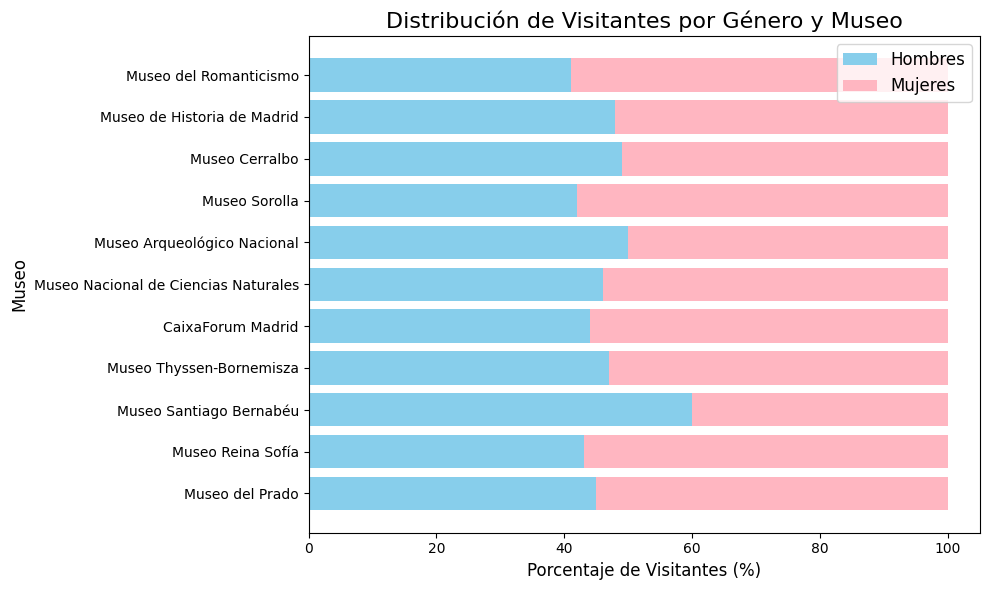

In [48]:
museos = visitantes['Museo']
visitantes_hombres = visitantes['Visitantes_Hombres (%)']
visitantes_mujeres = visitantes['Visitantes_Mujeres (%)']

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(museos, visitantes_hombres, color='skyblue', label='Hombres')
ax.barh(museos, visitantes_mujeres, left=visitantes_hombres, color='lightpink', label='Mujeres')

ax.set_title('Distribución de Visitantes por Género y Museo', fontsize=16)
ax.set_xlabel('Porcentaje de Visitantes (%)', fontsize=12)
ax.set_ylabel('Museo', fontsize=12)

ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

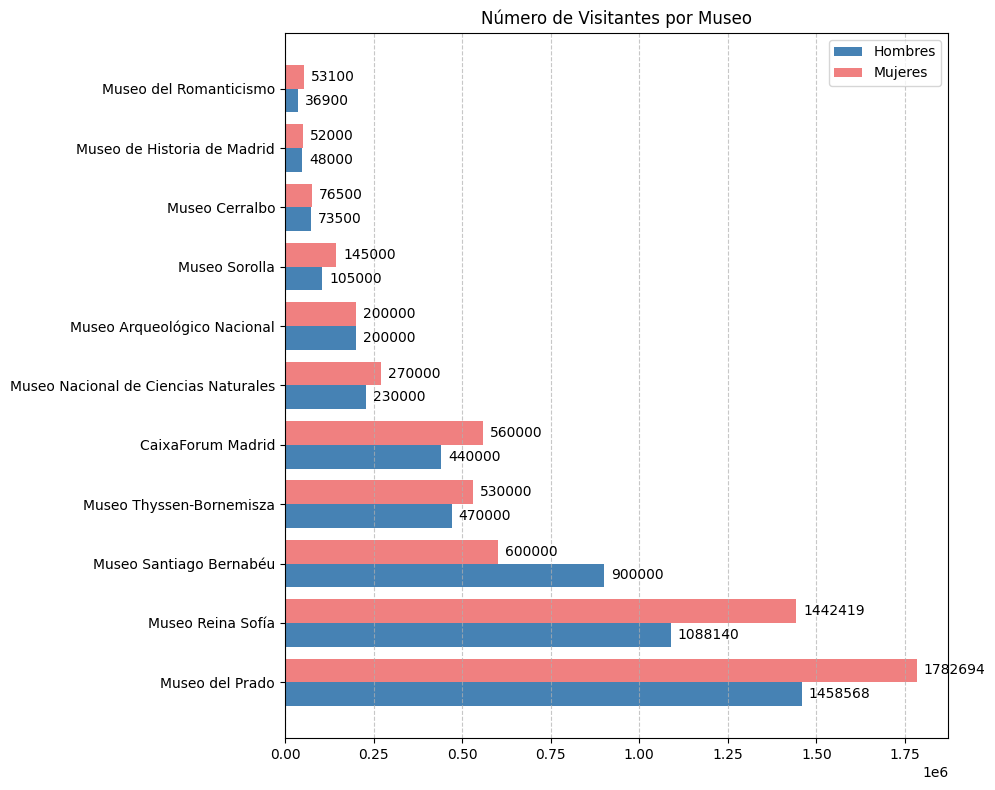

In [49]:
museos = visitantes['Museo']
visitantes_hombres = visitantes['Visitantes_Hombres (%)']
visitantes_mujeres = visitantes['Visitantes_Mujeres (%)']
total_visitantes = visitantes['Visitantes']

bar_width = 0.4
indices = np.arange(len(museos))

fig, ax = plt.subplots(figsize=(10, 8))

bars_hombres = ax.barh(indices - bar_width/2, total_visitantes * (visitantes_hombres / 100), bar_width, label='Hombres', color='steelblue')
bars_mujeres = ax.barh(indices + bar_width/2, total_visitantes * (visitantes_mujeres / 100), bar_width, label='Mujeres', color='lightcoral')

for bars in [bars_hombres, bars_mujeres]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(5 if width > 0 else -30, 0), textcoords="offset points", ha='left' if width > 0 else 'right', va='center')

ax.set_yticks(indices)
ax.set_yticklabels(museos)
ax.set_title('Número de Visitantes por Museo')

ax.xaxis.grid(True, linestyle='--', alpha=0.7)

ax.legend()

plt.tight_layout()
plt.show()

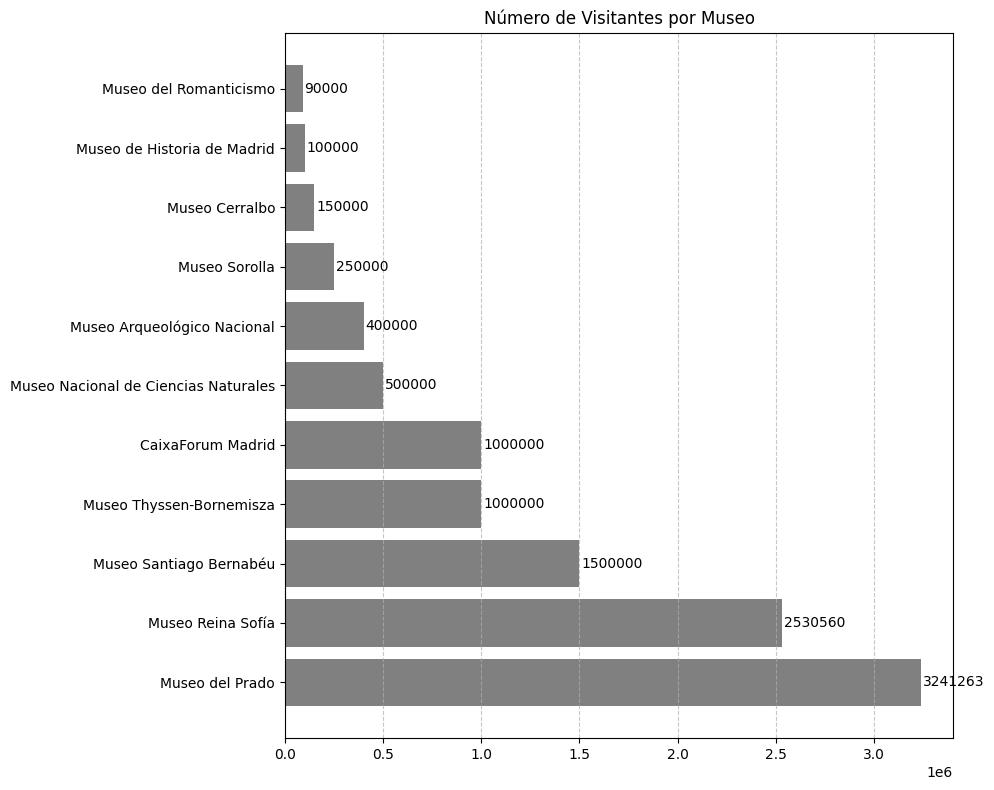

In [50]:
visitantes_totales = ranking_visitas_museos['Visitantes']
museos = ['Museo del Prado', 'Museo Reina Sofía', 'Museo Santiago Bernabéu', 
          'Museo Thyssen-Bornemisza', 'CaixaForum Madrid', 
          'Museo Nacional de Ciencias Naturales', 'Museo Arqueológico Nacional', 
          'Museo Sorolla', 'Museo Cerralbo', 'Museo de Historia de Madrid', 
          'Museo del Romanticismo']

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(museos, visitantes_totales, color='grey')

# Añadir etiquetas encima de las barras
for i, v in enumerate(visitantes_totales):
    ax.text(v + 10000, i, str(v), color='black', va='center')

ax.set_title('Número de Visitantes por Museo')

ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

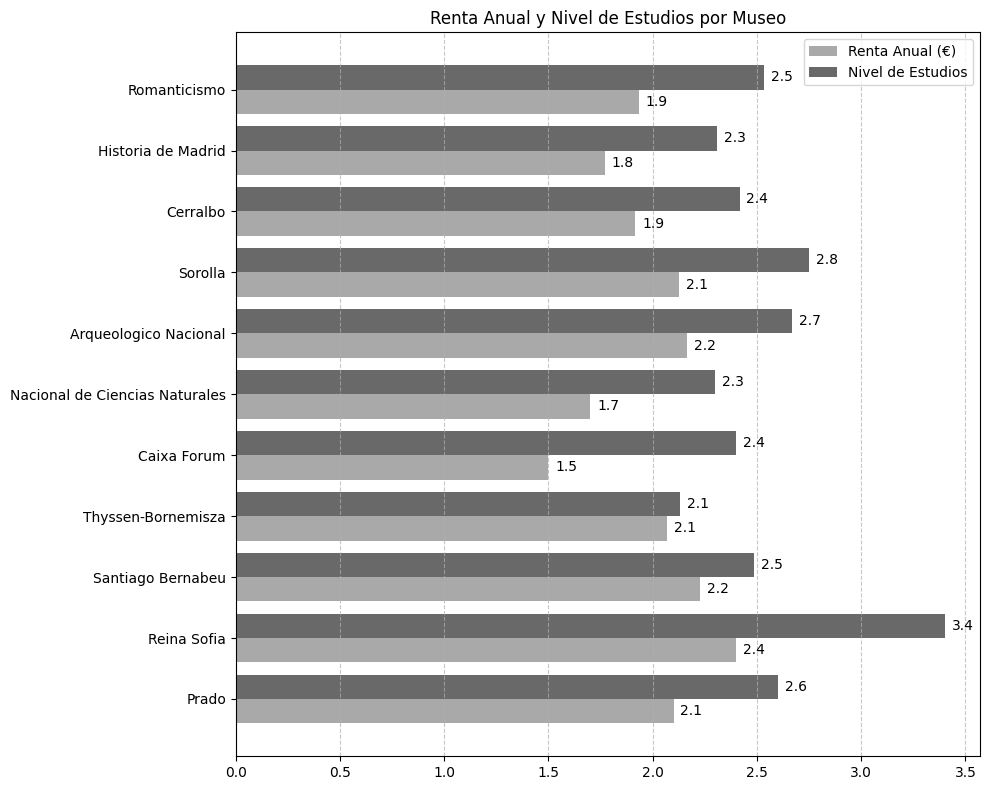

In [51]:
renta_anual = museos_madrid_max_visitantes['Renta Anual (€)']
nivel_estudios = museos_madrid_max_visitantes['Nivel de Estudios']
museos = museos_madrid_max_visitantes['Museo']

color_renta = '#A9A9A9'  
color_estudios = '#696969'  

bar_width = 0.4
indices = np.arange(len(museos))

fig, ax = plt.subplots(figsize=(10, 8))

bars_renta = ax.barh(indices - bar_width/2, renta_anual, bar_width, label='Renta Anual (€)', color=color_renta)
bars_estudios = ax.barh(indices + bar_width/2, nivel_estudios, bar_width, label='Nivel de Estudios', color=color_estudios)

for bars in [bars_renta, bars_estudios]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(5 if width > 0 else -30, 0), textcoords="offset points", ha='left' if width > 0 else 'right', va='center')

ax.set_yticks(indices)
ax.set_yticklabels(museos)
ax.set_title('Renta Anual y Nivel de Estudios por Museo')

ax.xaxis.grid(True, linestyle='--', alpha=0.7)

ax.legend()

plt.tight_layout()
plt.show()

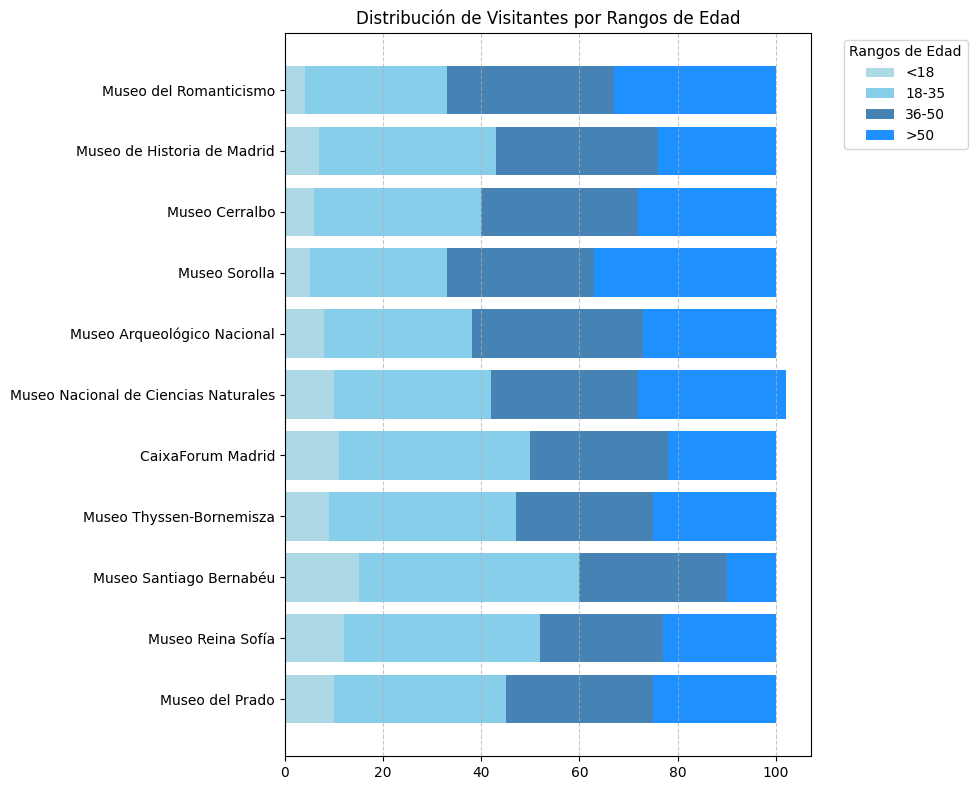

In [52]:
museos = visitantes['Museo']
edad_menor_18 = visitantes['Edad_<18 (%)']
edad_18_35 = visitantes['Edad_18-35 (%)']
edad_36_50 = visitantes['Edad_36-50 (%)']
edad_mayor_50 = visitantes['Edad_>50 (%)']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.7  

ax.barh(museos, edad_menor_18, color='#add8e6', label='<18', edgecolor='none')
ax.barh(museos, edad_18_35, left=edad_menor_18, color='#87ceeb', label='18-35', edgecolor='none')
ax.barh(museos, edad_36_50, left=edad_menor_18 + edad_18_35, color='#4682b4', label='36-50', edgecolor='none')
ax.barh(museos, edad_mayor_50, left=edad_menor_18 + edad_18_35 + edad_36_50, color='#1e90ff', label='>50', edgecolor='none')

ax.set_title('Distribución de Visitantes por Rangos de Edad')

ax.legend(title='Rangos de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


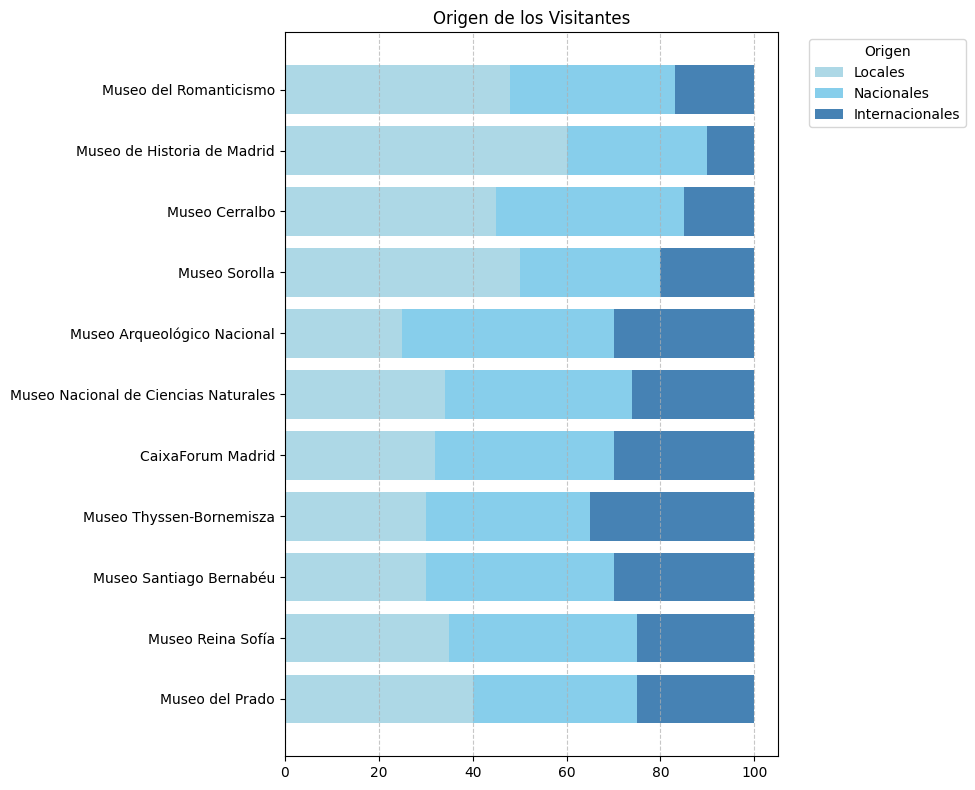

In [53]:
museos = visitantes['Museo']
locales = visitantes['Locales (%)']
nacionales = visitantes['Nacionales (%)']
internacionales = visitantes['Internacionales (%)']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.7  

ax.barh(museos, locales, color='#add8e6', label='Locales', edgecolor='none')
ax.barh(museos, nacionales, left= locales, color='#87ceeb', label='Nacionales', edgecolor='none')
ax.barh(museos, internacionales, left= locales + nacionales, color='#4682b4', label='Internacionales', edgecolor='none')

ax.set_title('Origen de los Visitantes')

ax.legend(title='Origen', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [54]:
data_meses = {
    "Mes": ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    "Visitantes Museo del Prado": [236825, 265372, 315610, 325495, 327159, 315958, 274460, 257264, 278643, 294883, 254006, 256904],
    "Visitantes Museo Reina Sofía": [230000, 240000, 290000, 300000, 310000, 305000, 260000, 255000, 270000, 285000, 250000, 260000]}

df_meses = pd.DataFrame(data_meses)
df_meses

,Mes,Visitantes Museo del Prado,Visitantes Museo Reina Sofía
0,Enero,236825,230000
1,Febrero,265372,240000
2,Marzo,315610,290000
3,Abril,325495,300000
4,Mayo,327159,310000
5,Junio,315958,305000
6,Julio,274460,260000
7,Agosto,257264,255000
8,Septiembre,278643,270000
9,Octubre,294883,285000


In [55]:
fuente_prado_2024_entradas = "https://www.museodelprado.es/museo/datos-visitas"

data_prado_restauracion = {
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Totales 2024', '%'],
    'Entrada general': [102710, 105243, 138412, 146200, 156347, 152759, 132756, 122733, 144454, 33536, 1235150, '46.45%'],
    'Entrada reducida': [11462, 13540, 16500, 19075, 19127, 16082, 10576, 11110, 19577, 4645, 141694, '5.33%'],
    'Otros precios': [5845, 7745, 10948, 12429, 12368, 9080, 6600, 6842, 8552, 1737, 82146, '3.09%'],
    'Entrada gratuita': [116808, 138844, 149750, 147791, 139317, 138037, 124528, 116579, 106060, 22107, 1199821, '45.13%'],
    'Totales': [236825, 265372, 315610, 325495, 327159, 315958, 274460, 257264, 278643, 62025, 2658811, '']}

prado_entradas_2024 = pd.DataFrame(data_prado_restauracion)
prado_entradas_2024

,Mes,Entrada general,Entrada reducida,Otros precios,Entrada gratuita,Totales
0,Enero,102710,11462,5845,116808,236825
1,Febrero,105243,13540,7745,138844,265372
2,Marzo,138412,16500,10948,149750,315610
3,Abril,146200,19075,12429,147791,325495
4,Mayo,156347,19127,12368,139317,327159
5,Junio,152759,16082,9080,138037,315958
6,Julio,132756,10576,6600,124528,274460
7,Agosto,122733,11110,6842,116579,257264
8,Septiembre,144454,19577,8552,106060,278643
9,Octubre,33536,4645,1737,22107,62025


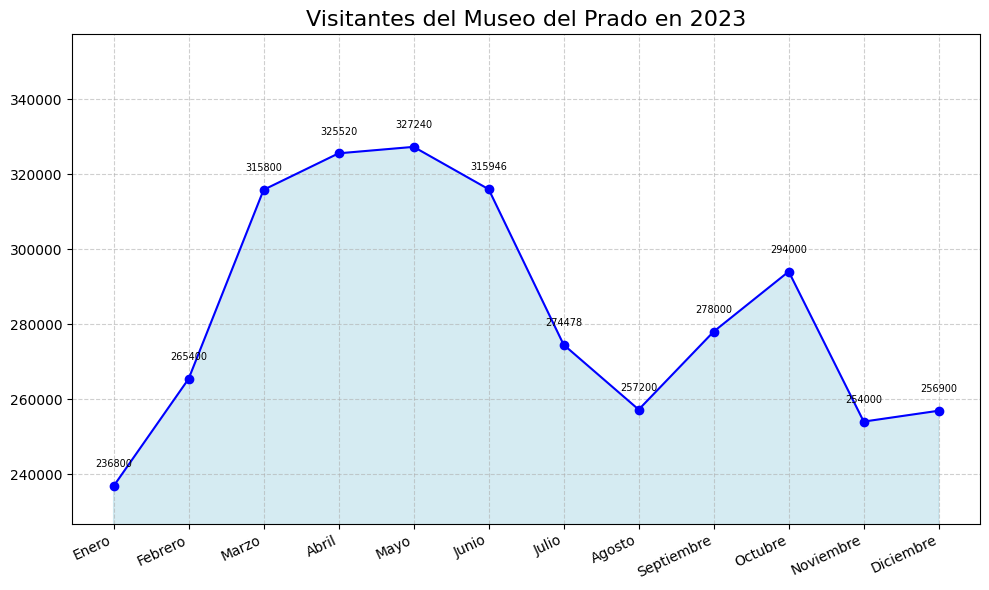

In [56]:
meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
visitantes_prado = [
    236800, 265400, 315800, 325520, 327240, 315946,
    274478, 257200, 278000, 294000, 254000, 256900]

plt.figure(figsize=(10, 6))
plt.plot(meses, visitantes_prado, marker='o', linestyle='-', color='blue', label='Visitantes Museo del Prado')
plt.fill_between(meses, visitantes_prado, color='lightblue', alpha=0.5)

plt.title('Visitantes del Museo del Prado en 2023', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=25, ha='right')

for i, valor in enumerate(visitantes_prado):
    plt.text(meses[i], valor + 5000, str(valor), ha='center', fontsize=7)

plt.subplots_adjust(top=0.85)

plt.ylim(min(visitantes_prado) - 10000, max(visitantes_prado) + 30000)

plt.tight_layout()
plt.show()

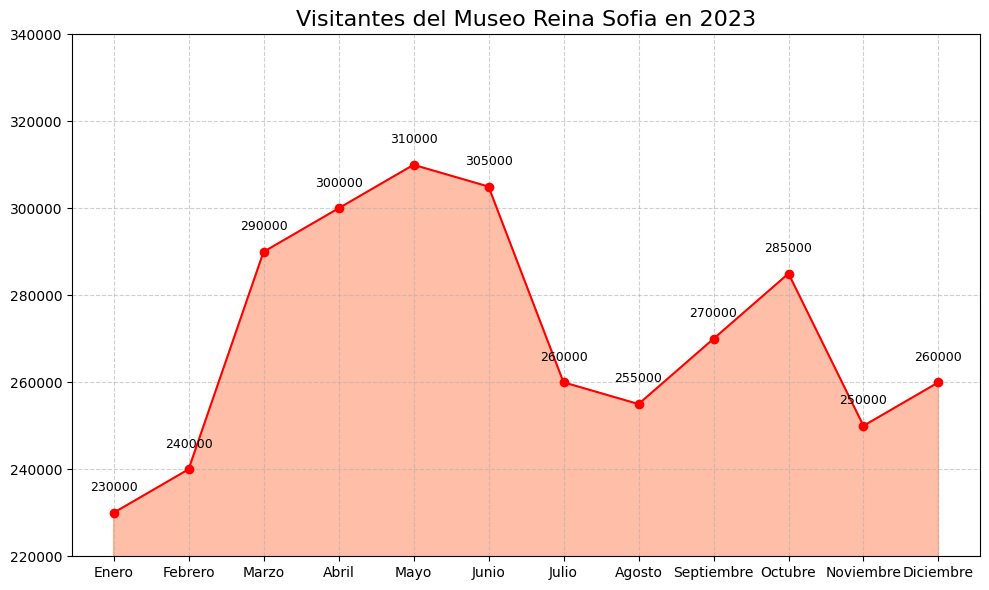

In [57]:
meses = df_meses['Mes']
visitantes_reina = df_meses['Visitantes Museo Reina Sofía']

plt.figure(figsize=(10, 6))
plt.plot(meses, visitantes_reina, marker='o', linestyle='-', color='red', label='Visitantes Museo del Prado')

plt.fill_between(meses, visitantes_reina, color='coral', alpha=0.5)

plt.title('Visitantes del Museo Reina Sofia en 2023', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

for i, valor in enumerate(visitantes_reina):
    plt.text(meses[i], valor + 5000, str(valor), ha='center', fontsize=9)

plt.subplots_adjust(top=0.85)

plt.ylim(min(visitantes_reina) - 10000, max(visitantes_reina) + 30000)

plt.tight_layout()
plt.show()

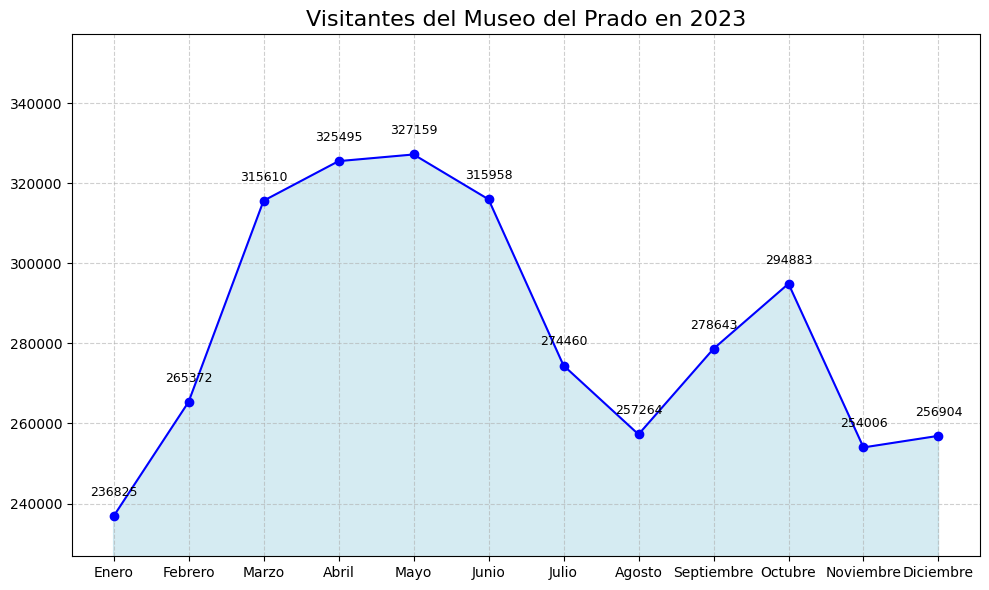

In [58]:
meses = df_meses['Mes']
visitantes_prado = df_meses['Visitantes Museo del Prado']

plt.figure(figsize=(10, 6))
plt.plot(meses, visitantes_prado, marker='o', linestyle='-', color='blue', label='Visitantes Museo del Prado')

plt.fill_between(meses, visitantes_prado, color='lightblue', alpha=0.5)

plt.title('Visitantes del Museo del Prado en 2023', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

for i, valor in enumerate(visitantes_prado):
    plt.text(meses[i], valor + 5000, str(valor), ha='center', fontsize=9)

plt.subplots_adjust(top=0.85)

plt.ylim(min(visitantes_prado) - 10000, max(visitantes_prado) + 30000)

plt.tight_layout()
plt.show()

In [59]:
prado_entradas_2024

,Mes,Entrada general,Entrada reducida,Otros precios,Entrada gratuita,Totales
0,Enero,102710,11462,5845,116808,236825
1,Febrero,105243,13540,7745,138844,265372
2,Marzo,138412,16500,10948,149750,315610
3,Abril,146200,19075,12429,147791,325495
4,Mayo,156347,19127,12368,139317,327159
5,Junio,152759,16082,9080,138037,315958
6,Julio,132756,10576,6600,124528,274460
7,Agosto,122733,11110,6842,116579,257264
8,Septiembre,144454,19577,8552,106060,278643
9,Octubre,33536,4645,1737,22107,62025


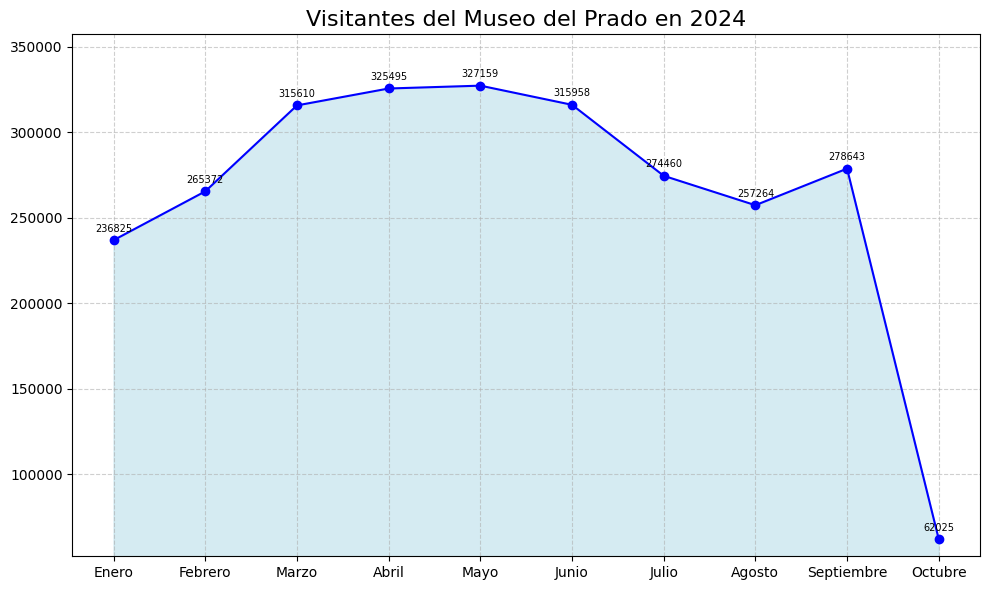

In [60]:
meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre']
visitantes_prado = [
    236825, 265372, 315610, 325495, 327159, 315958,
    274460, 257264, 278643, 62025]

plt.figure(figsize=(10, 6))
plt.plot(meses, visitantes_prado, marker='o', linestyle='-', color='blue', label='Visitantes Museo del Prado')

plt.fill_between(meses, visitantes_prado, color='lightblue', alpha=0.5)

plt.title('Visitantes del Museo del Prado en 2024', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

for i, valor in enumerate(visitantes_prado):
    plt.text(meses[i], valor + 5000, str(valor), ha='center', fontsize=7)

plt.subplots_adjust(top=0.85)

plt.ylim(min(visitantes_prado) - 10000, max(visitantes_prado) + 30000)

plt.tight_layout()
plt.show()

___

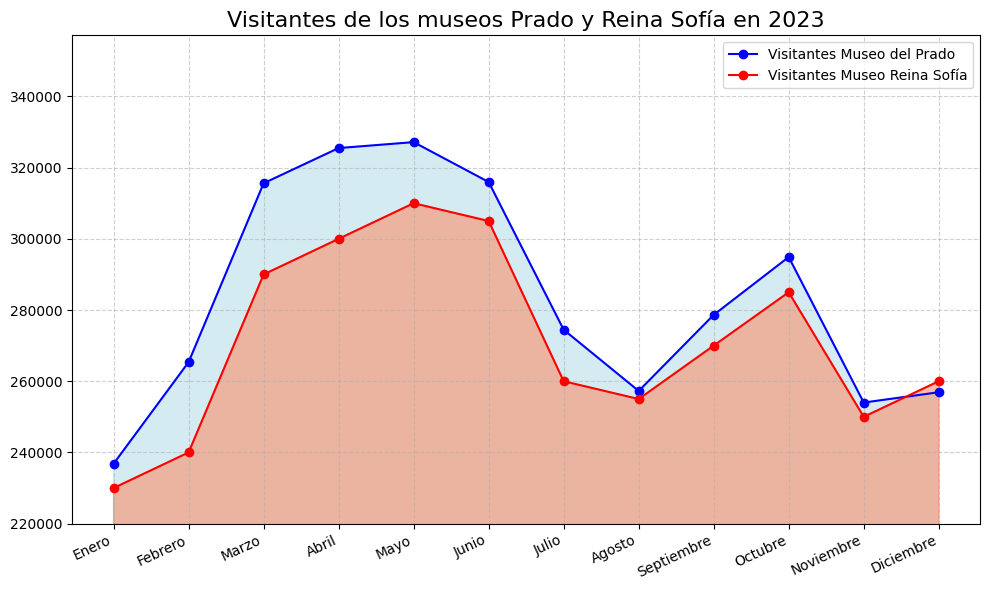

In [61]:
meses = df_meses['Mes']
visitantes_prado = df_meses['Visitantes Museo del Prado']
visitantes_reina = df_meses['Visitantes Museo Reina Sofía']

plt.figure(figsize=(10, 6))

# Primera gráfica: Visitantes del Museo del Prado
plt.plot(meses, visitantes_prado, marker='o', linestyle='-', color='blue', label='Visitantes Museo del Prado')
plt.fill_between(meses, visitantes_prado, color='lightblue', alpha=0.5)

# Segunda gráfica: Visitantes del Museo Reina Sofía
plt.plot(meses, visitantes_reina, marker='o', linestyle='-', color='red', label='Visitantes Museo Reina Sofía')
plt.fill_between(meses, visitantes_reina, color='coral', alpha=0.5)

plt.title('Visitantes de los museos Prado y Reina Sofía en 2023', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=25, ha='right')

plt.subplots_adjust(top=0.85, bottom=0.2)

plt.ylim(min(min(visitantes_prado), min(visitantes_reina)) - 10000,
         max(max(visitantes_prado), max(visitantes_reina)) + 30000)

plt.legend()

plt.tight_layout()
plt.show()

___

___